# Librerias de apoyo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

from glob import glob
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from sklearn.utils import shuffle

import imutils

# Datos de píxeles SVM

In [ ]:
df_test=pd.read_csv('datos/df_test_DA_3cat.csv',header=None)
#df_test=df_test.loc[:, :6]
df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1028,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train=pd.read_csv('datos/df_train_DA_3cat.csv',header=None)
#df_train=df_train.loc[:, 7:]
df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train=shuffle(df_train)
df_train= df_train.reset_index(drop=True)
df_train

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9352,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9353,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9354,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#frames_e = [df_train, df_test]
#df_chiles_train = pd.concat(frames_e)
#df_chiles_train.to_csv('df_chiles_pixeles.csv', header=False, index=False)

In [ ]:
#df_train=pd.read_csv('df_chiles_pixeles.csv',header=None)
#df_train

## Se preparan los datos

In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

## Se define el Pipeline y el Clasificador

In [ ]:
#Definir el pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

steps=[
    ('scaler',StandardScaler()),
    ('SVM',SVC(kernel='poly'))
]
pipeline=Pipeline(steps)

## Se realiza el Tuning

In [ ]:
#Parámetros
# C = [0.0001,0.001]
# gamma = [20,10]
parametros={'SVM__C': [0.000001, 0.00001, 0.0001,0.001], 'SVM__gamma':[30, 20,10]}

In [ ]:
#Realizar el tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipeline, param_grid=parametros, cv=10, n_jobs=-1, verbose=5)

In [ ]:
#Ajuste
grid.fit(X_train,y_train)
#80 m 3.3s

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 4/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.788 total time= 2.5min
[CV 3/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.780 total time= 2.9min
[CV 2/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.780 total time= 3.2min
[CV 1/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.828 total time= 3.2min
[CV 5/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.804 total time= 2.9min
[CV 7/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.820 total time= 2.2min
[CV 6/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.783 total time= 2.9min
[CV 8/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.790 total time= 2.9min
[CV 10/10] END .....SVM__C=1e-06, SVM__gamma=30;, score=0.826 total time= 2.4min
[CV 9/10] END ......SVM__C=1e-06, SVM__gamma=30;, score=0.818 total time= 2.9min
[CV 1/10] END ......SVM__C=1e-06, SVM__gamma=20;, score=0.828 total time= 3.0min
[CV 2/10] END ......SVM__C=1e-06, SVM__gamma=2

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid={'SVM__C': [1e-06, 1e-05, 0.0001, 0.001],
                         'SVM__gamma': [30, 20, 10]},
             verbose=5)

In [ ]:
#mostrar los mejores valores del tuning
grid.best_params_
#C: 1e-06 gamma: 30

{'SVM__C': 1e-06, 'SVM__gamma': 30}

## Se prueba el clasificador SVM

In [ ]:
# Encontrar el score
grid.score(X_test,y_test)
#0.8207364341085271

0.8207364341085271

In [ ]:
# Realizar la predicción en los datos de test
y_pred=grid.predict(X_test)

In [ ]:
#mostrar la predicción para los primeros 10 valores de prueba
y_pred[0:10]

array([3., 1., 1., 3., 2., 2., 2., 2., 3., 1.])

In [ ]:
#mostrar los valores reales de los primeros 10 valores de prueba
y_test[0:10]

0    3.0
1    2.0
2    1.0
3    1.0
4    1.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: 0, dtype: float64

In [ ]:
# Creación del dataframe de resultados
resultados=pd.DataFrame()
resultados['y_test']=y_test
resultados['y_pred_imagen']=y_pred
resultados

,y_test,y_pred_imagen
0,3.0,3.0
1,2.0,1.0
2,1.0,1.0
3,1.0,3.0
4,1.0,2.0
...,...,...
1027,2.0,1.0
1028,2.0,2.0
1029,2.0,2.0
1030,2.0,2.0


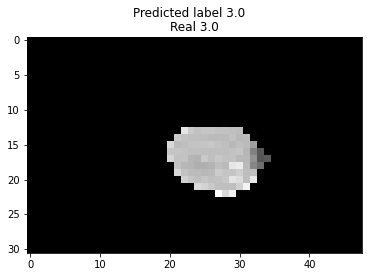

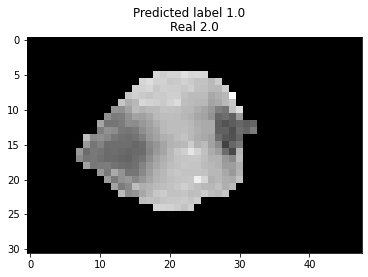

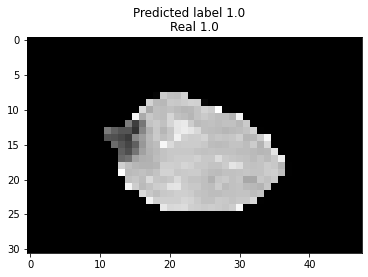

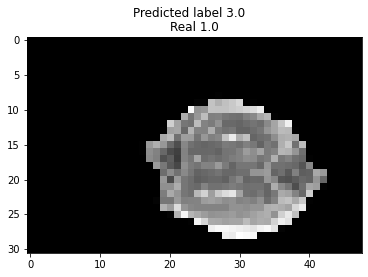

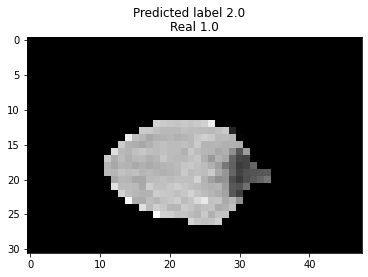

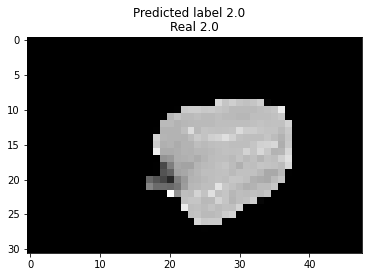

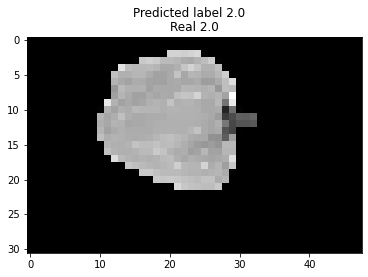

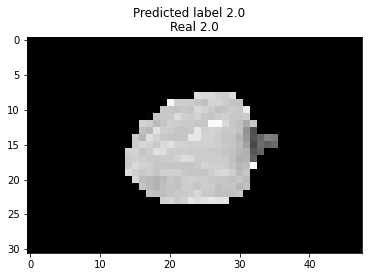

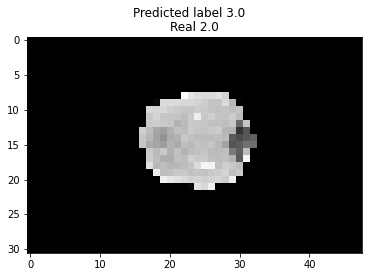

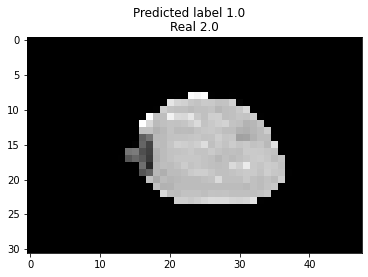

In [ ]:
#Mostrar la prediccion y la clase de chile
for i in range(0,10):
    img=X_test.loc[:,7:].values[i].reshape((31,48))
    plt.suptitle('Predicted label {0}'.format(y_pred[i]))
    plt.title('Real {0}'.format(y_test[i]))
    plt.imshow(img,cmap='gray')
    plt.show()

Text(0.5, 1.0, 'SVM con Píxeles (Data Augmentation)')

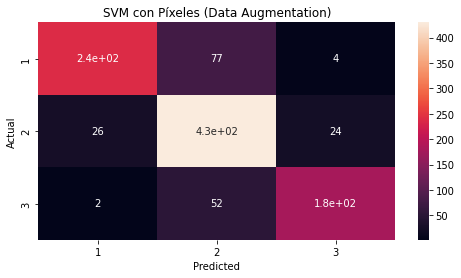

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1, 4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("SVM con Píxeles (Data Augmentation)")

# Datos de la elipse SVM

In [ ]:
df_test=pd.read_csv('datos/df_test_DA_3cat.csv',header=None)
df_test=df_test.loc[:, :6]
#df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,1,2,3,4,5,6
0,2.0,445.864594,294.292786,440.779144,319.277313,110529.696866,2403.067137
1,3.0,509.292877,336.678436,306.255341,264.654938,63658.082589,1795.949095
2,1.0,519.523865,322.128357,454.560425,382.835327,136676.393424,2635.583603
3,3.0,438.688934,281.948456,309.601013,262.724060,63884.000083,1801.029056
4,2.0,413.568695,366.057678,496.682861,272.551086,106320.490927,2468.185458
...,...,...,...,...,...,...,...
1027,3.0,434.002686,355.144958,343.180389,279.093201,75224.896750,1960.117413
1028,2.0,540.745422,340.521454,412.648468,358.187134,116086.067726,2424.674478
1029,3.0,462.503113,270.712921,312.190155,286.322906,70204.536873,1881.162385
1030,2.0,484.711914,334.449829,424.085968,420.594543,140090.091328,2653.653424


In [ ]:
df_train=pd.read_csv('datos/df_train_DA_3cat.csv',header=None)
df_train=df_train.loc[:, :6]
#df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train=shuffle(df_train)
df_train= df_train.reset_index(drop=True)
df_train

,0,1,2,3,4,5,6
0,1.0,550.858154,352.667450,508.112976,385.314362,153767.786896,2820.056605
1,3.0,520.701050,312.971985,290.656281,251.518570,57416.887752,1705.512169
2,2.0,461.936920,313.294983,435.122345,339.523285,116030.144142,2442.895894
3,2.0,477.738037,286.065186,410.857697,293.655762,94758.861624,2228.634232
4,3.0,529.447327,308.746155,338.562988,211.756653,56307.523174,1751.905435
...,...,...,...,...,...,...,...
9351,3.0,466.718597,324.555054,298.706543,233.635864,54811.807892,1678.655811
9352,1.0,413.664337,327.325989,397.965302,346.126282,108185.651823,2340.469975
9353,1.0,598.573425,315.949432,584.961548,399.191498,183399.641811,3119.410517
9354,3.0,461.521057,294.865356,322.114532,201.887466,51075.139105,1667.937722


In [ ]:
#frames_e = [df_train, df_test]
#df_chiles_train = pd.concat(frames_e)
#df_chiles_train.to_csv('df_chiles_datos.csv', header=False, index=False)

In [ ]:
#df_test=pd.read_csv('df_chiles_datos.csv',header=None)
#df_test.columns=['Clasificación', 'Centro_X', 'Centro_Y', 'Largo', 'Ancho', 'Área', 'Perímetro']
#df_test

## Se preparan los datos

In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

## Se define el Pipeline y el Clasificador

In [ ]:
#Definir el pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

steps=[
    ('scaler',StandardScaler()),
    ('SVM',SVC(kernel='poly'))
]
pipeline=Pipeline(steps)

## Se realiza el Tuning

In [ ]:
#Parámetros
# C = [0.0001,0.001]
# gamma = [20,10]
parametros={'SVM__C': [0.00001, 0.0001,0.001], 'SVM__gamma':[ 30, 20,10, 5]}

In [ ]:
#Realizar el tuning
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(pipeline, param_grid=parametros, cv=10, n_jobs=-1, verbose=5)

In [ ]:
#Ajuste
grid.fit(X_train,y_train)
#81 m 13.5s

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 3/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.800 total time=  22.2s
[CV 1/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.817 total time=  25.8s
[CV 2/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.802 total time=  26.5s
[CV 4/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.792 total time=  28.9s
[CV 5/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.783 total time=  19.4s
[CV 7/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.790 total time=  21.4s
[CV 6/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.788 total time=  25.0s
[CV 8/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.766 total time=  25.3s
[CV 1/10] END ......SVM__C=1e-05, SVM__gamma=20;, score=0.815 total time=   8.6s
[CV 9/10] END ......SVM__C=1e-05, SVM__gamma=30;, score=0.807 total time=  20.8s
[CV 10/10] END .....SVM__C=1e-05, SVM__gamma=30;, score=0.819 total time=  18.2s
[CV 2/10] END ......SVM__C=1e-05, SVM__gamma=2

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid={'SVM__C': [1e-05, 0.0001, 0.001],
                         'SVM__gamma': [30, 20, 10, 5]},
             verbose=5)

In [ ]:
#mostrar los mejores valores del tuning
grid.best_params_
#c:0.001 gamma:30

{'SVM__C': 0.001, 'SVM__gamma': 30}

## Se prueba el clasificador SVM

In [ ]:
# Encontrar el score
grid.score(X_test,y_test)
#0.8187984496124031

0.8187984496124031

In [ ]:
# Realizar la predicción en los datos de test
y_pred=grid.predict(X_test)

In [ ]:
#mostrar la predicción para los primeros 10 valores de prueba
y_pred[0:10]

array([2., 3., 1., 3., 2., 1., 2., 1., 2., 1.])

In [ ]:
#mostrar los valores reales de los primeros 10 valores de prueba
y_test[0:10]

0    2.0
1    3.0
2    1.0
3    3.0
4    2.0
5    1.0
6    2.0
7    1.0
8    2.0
9    2.0
Name: 0, dtype: float64

Text(0.5, 1.0, 'SVM Elipse (Data Augmentation)')

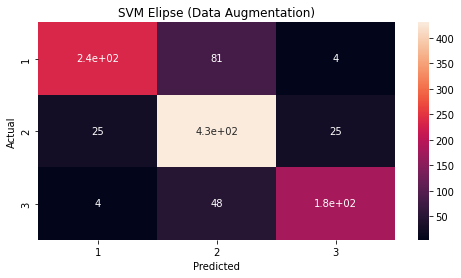

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1,4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("SVM Elipse (Data Augmentation)")

# Píxeles Random Forest

In [ ]:
df_test=pd.read_csv('datos/df_test_DA_3cat.csv',header=None)
#df_test=df_test.loc[:, :6]
df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1028,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1030,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train=pd.read_csv('datos/df_train_DA_3cat.csv',header=None)
#df_train=df_train.loc[:, 7:]
df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train=shuffle(df_train)
df_train= df_train.reset_index(drop=True)
df_train

,0,7,8,9,10,11,12,13,14,15,...,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9352,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9353,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9354,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

In [ ]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Modelo
model= RandomForestClassifier(random_state=17, max_depth=5, n_estimators=10)

In [ ]:
# Ajuste del modelado
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=17)

In [ ]:
# Predicción
y_pred= model.predict(X_test)

In [ ]:
# Comparación
np.equal(y_pred, y_test.values)

array([ True,  True,  True, ..., False,  True,  True])

In [ ]:
# Score
model.score(X_test, y_test)

0.7926356589147286

In [ ]:
#RandomForestClassifier(random_state=17,max_depth=i,n_estimators=j)
for j in range(10, 50, 10):
    for i in range(1, 10, 2):
        for k in range(1, 10, 2):
            for l in range(2, 10, 2):
                print(f'Modelo con max_depth {i}, n_estimators = {j}, min_samples_leaf = {k}, min_samples_split = {l}')
                model= RandomForestClassifier(random_state=17, max_depth=i, n_estimators=j, min_samples_leaf=k, min_samples_split=l)
                model.fit(X_train, y_train)
                print( f'Precisión:  {model.score(X_test, y_test)}')
                print('.....')


#3m 43.7s

Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 2
Precisión:  0.46511627906976744
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 4
Precisión:  0.46511627906976744
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 6
Precisión:  0.46511627906976744
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 8
Precisión:  0.46511627906976744
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 2
Precisión:  0.46511627906976744
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 4
Precisión:  0.46511627906976744
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 6
Precisión:  0.46511627906976744
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 8
Precisión:  0.46511627906976744
.....


In [ ]:
model= RandomForestClassifier(random_state=17, max_depth=7, n_estimators=20, min_samples_leaf=3, min_samples_split=6)
# n_stimators:20 min_samples_split=2,4,6
# n_stimators:40 min_samples_split=6
model.fit(X_train, y_train)
print( f'Precisión:  {model.score(X_test, y_test)}')
#0.6s
#0.8158914728682171

Precisión:  0.8158914728682171


In [ ]:
y_pred= model.predict(X_test)

Text(0.5, 1.0, 'Random Forest con Píxeles (Data Augmentation)')

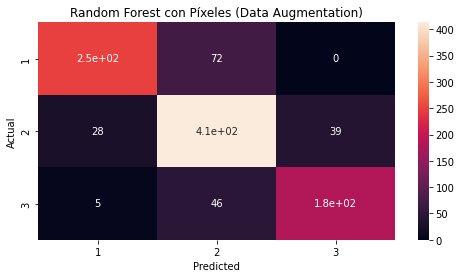

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1,4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("Random Forest con Píxeles (Data Augmentation)")

# Elipse Random Forest

In [ ]:
df_test=pd.read_csv('datos/df_test_DA_3cat.csv',header=None)
df_test=df_test.loc[:, :6]
#df_test=pd.concat([df_test[0],df_test.loc[:, 7:]], axis=1)
df_test=shuffle(df_test)
df_test= df_test.reset_index(drop=True)
df_test

,0,1,2,3,4,5,6
0,3.0,491.452850,321.319000,312.480469,297.174042,72932.924719,1915.587967
1,1.0,472.755615,294.631378,495.103577,335.709412,130541.759482,2634.149190
2,2.0,487.914154,316.925812,440.740570,275.326904,95306.289580,2279.703959
3,1.0,382.023163,289.992279,485.397919,317.392700,120999.820280,2549.731358
4,2.0,538.993591,363.118134,398.576416,384.625824,120403.723762,2460.697572
...,...,...,...,...,...,...,...
1027,2.0,449.444580,320.785431,431.168427,332.097504,112461.130111,2407.980948
1028,2.0,475.192902,289.974030,407.960022,303.563232,97265.014648,2247.362721
1029,2.0,433.741974,360.271667,399.574371,360.852112,113244.405832,2390.499157
1030,2.0,385.606384,244.276901,405.137054,307.451233,97829.106393,2249.192053


In [ ]:
df_train=pd.read_csv('datos/df_train_DA_3cat.csv',header=None)
df_train=df_train.loc[:, :6]
#df_train=pd.concat([df_train[0],df_train.loc[:, 7:]], axis=1)
df_train

,0,1,2,3,4,5,6
0,1.0,437.342041,327.075958,462.746338,367.902679,133710.595399,2618.073078
1,1.0,488.150787,288.588776,485.004059,358.550690,136579.593778,2665.014406
2,1.0,405.718903,369.396179,534.975586,430.978424,181083.705653,3043.434198
3,1.0,456.275665,318.343170,451.936096,349.750244,124143.772185,2528.812121
4,1.0,470.498474,286.118317,430.676575,332.296356,112400.103396,2406.923671
...,...,...,...,...,...,...,...
9351,3.0,478.496399,299.825226,353.197784,300.192871,83273.769974,2056.065815
9352,3.0,488.328766,265.976288,319.256866,282.916290,70939.493419,1893.505629
9353,3.0,424.664337,338.818817,420.318054,323.013550,106632.273004,2345.259832
9354,3.0,494.553131,325.828857,360.041687,268.039795,75795.242418,1983.774830


In [ ]:
# Definir los conjuntos de datos de las muestras de entrenamiento y prueba
X_train=df_train.iloc[:,1:]
y_train=df_train.iloc[:,0]

X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]

In [ ]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Modelo
model= RandomForestClassifier(random_state=17, max_depth=5, n_estimators=10)

In [ ]:
# Ajuste del modelado
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=17)

In [ ]:
# Predicción
y_pred= model.predict(X_test)

In [ ]:
# Comparación
np.equal(y_pred, y_test.values)

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
# Score
model.score(X_test, y_test)

0.8362403100775194

In [ ]:
#RandomForestClassifier(random_state=17,max_depth=i,n_estimators=j)
for j in range(10, 50, 10):
    for i in range(1, 10, 2):
        for k in range(1, 10, 2):
            for l in range(2, 10, 2):
                print(f'Modelo con max_depth {i}, n_estimators = {j}, min_samples_leaf = {k}, min_samples_split = {l}')
                model= RandomForestClassifier(random_state=17, max_depth=i, n_estimators=j, min_samples_leaf=k, min_samples_split=l)
                model.fit(X_train, y_train)
                print( f'Precisión:  {model.score(X_test, y_test)}')
                print('.....')
#1min 39.6s

Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 2
Precisión:  0.811046511627907
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 4
Precisión:  0.811046511627907
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 6
Precisión:  0.811046511627907
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 1, min_samples_split = 8
Precisión:  0.811046511627907
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 2
Precisión:  0.811046511627907
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 4
Precisión:  0.811046511627907
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 6
Precisión:  0.811046511627907
.....
Modelo con max_depth 1, n_estimators = 10, min_samples_leaf = 3, min_samples_split = 8
Precisión:  0.811046511627907
.....
Modelo con max_d

In [ ]:
# Modelo
model= RandomForestClassifier(random_state=17, max_depth=7, n_estimators=10, min_samples_leaf=9, min_samples_split=2)
#min_samples_split: 2,4,6,8
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_pred= model.predict(X_test)
print( f'Precisión:  {model.score(X_test, y_test)}')
#0.2 s
# 0.8556201550387597

Precisión:  0.8556201550387597


Text(0.5, 1.0, 'Random Forest Elipse (Data Augmentation)')

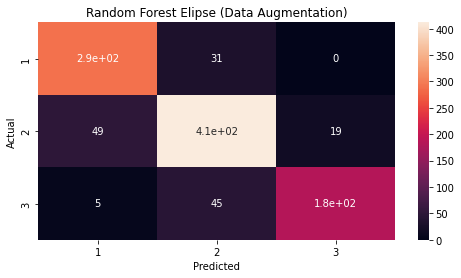

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

array=confusion_matrix(y_test,y_pred)
df_cm=pd.DataFrame(array,index=[i for i in range(1,4)],
                  columns=[i for i in range(1,4)])
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(8,4))
sn.heatmap(df_cm, annot=True)
plt.title("Random Forest Elipse (Data Augmentation)")

In [ ]:
resultados=pd.DataFrame()
resultados['y_test']=y_test
resultados['y_pred_elipse']=y_pred.tolist()
resultados

,y_test,y_pred_elipse
0,3.0,3.0
1,1.0,1.0
2,2.0,2.0
3,1.0,1.0
4,2.0,2.0
...,...,...
1027,2.0,1.0
1028,2.0,2.0
1029,2.0,2.0
1030,2.0,2.0


In [ ]:
resultados[(resultados['y_test']==1) & (resultados['y_pred_elipse']==1)]

,y_test,y_pred_elipse
1,1.0,1.0
3,1.0,1.0
5,1.0,1.0
7,1.0,1.0
14,1.0,1.0
...,...,...
1017,1.0,1.0
1018,1.0,1.0
1020,1.0,1.0
1022,1.0,1.0


In [ ]:
resultados[(resultados['y_test']==0) & (resultados['y_pred_elipse']==1)].count()

y_test           0
y_pred_elipse    0
dtype: int64